# 1. Import libraries and Read data

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_rows', 250)
pd.set_option('max_columns', 250)

In [92]:
# Reading the data
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# 2. Exploratory Data Analysis

## 2.1 Basic Statistics

In [93]:
# Inspect data
telecom_df.shape

(99999, 226)

In [94]:
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

We have 99999 rows and 226 columns. Most of the columns seems to be float. Date columns are showing as objects. There may be categorical columns showing as float or int that we'd need to identify and handle accordingly.

In [95]:
# Look at the summary stats
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## 2.2 Column Type Segregation

In [96]:
# lets separate date columns (column name contains 'date')
date_cols = [col for col in telecom_df.columns.values if 'date' in col]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [97]:
# lets try to find out categorical columns, any column having less that 20 unique value is a candidate
col_unique = {col:telecom_df[col].nunique() for col in telecom_df.columns.values if telecom_df[col].nunique() < 20}
col_unique

{'circle_id': 1,
 'loc_og_t2o_mou': 1,
 'std_og_t2o_mou': 1,
 'loc_ic_t2o_mou': 1,
 'last_date_of_month_6': 1,
 'last_date_of_month_7': 1,
 'last_date_of_month_8': 1,
 'last_date_of_month_9': 1,
 'std_og_t2c_mou_6': 1,
 'std_og_t2c_mou_7': 1,
 'std_og_t2c_mou_8': 1,
 'std_og_t2c_mou_9': 1,
 'std_ic_t2o_mou_6': 1,
 'std_ic_t2o_mou_7': 1,
 'std_ic_t2o_mou_8': 1,
 'std_ic_t2o_mou_9': 1,
 'night_pck_user_6': 2,
 'night_pck_user_7': 2,
 'night_pck_user_8': 2,
 'night_pck_user_9': 2,
 'monthly_2g_6': 5,
 'monthly_2g_7': 6,
 'monthly_2g_8': 6,
 'monthly_2g_9': 5,
 'monthly_3g_6': 12,
 'monthly_3g_7': 15,
 'monthly_3g_8': 12,
 'monthly_3g_9': 11,
 'fb_user_6': 2,
 'fb_user_7': 2,
 'fb_user_8': 2,
 'fb_user_9': 2}

In [98]:
# Now examine cols with only single unique value, ignore date columns and circle id column
one_unique_cols = ['loc_ic_t2o_mou','loc_og_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
                   'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_t2o_mou']
for col in one_unique_cols:
    print(col, str(telecom_df[col].unique()))

loc_ic_t2o_mou [ 0. nan]
loc_og_t2o_mou [ 0. nan]
std_ic_t2o_mou_6 [nan  0.]
std_ic_t2o_mou_7 [nan  0.]
std_ic_t2o_mou_8 [ 0. nan]
std_ic_t2o_mou_9 [nan  0.]
std_og_t2c_mou_6 [nan  0.]
std_og_t2c_mou_7 [nan  0.]
std_og_t2c_mou_8 [ 0. nan]
std_og_t2c_mou_9 [nan  0.]
std_og_t2o_mou [ 0. nan]


In [99]:
# Columns with a single unique values are either zero or NaN, we can safely drop them as they don't give us any information.
telecom_df.drop(one_unique_cols, axis=1, inplace=True)

In [100]:
# Now examine cols with 2 unique value.
two_unique_cols = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',  'night_pck_user_6',
                   'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',]
for col in two_unique_cols:
    print(col, str(telecom_df[col].unique()))

fb_user_6 [ 1. nan  0.]
fb_user_7 [ 1. nan  0.]
fb_user_8 [ 1. nan  0.]
fb_user_9 [nan  1.  0.]
night_pck_user_6 [ 0. nan  1.]
night_pck_user_7 [ 0. nan  1.]
night_pck_user_8 [ 0. nan  1.]
night_pck_user_9 [nan  0.  1.]


These looks like categorical columns with values 0, 1 and some missing values

In [101]:
# Now examine cols with more than 2 unique value
multi_unique_cols = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6',
                       'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9']
for col in multi_unique_cols:
    print(col, str(telecom_df[col].unique()))

monthly_2g_6 [0 1 2 3 4]
monthly_2g_7 [0 1 2 5 4 3]
monthly_2g_8 [0 1 2 5 3 4]
monthly_2g_9 [0 2 1 3 4]
monthly_3g_6 [ 1  0  4  2  3  5  7  6  9  8 11 14]
monthly_3g_7 [ 1  0  2  5  3  8  4  7  6  9 11 12 14 10 16]
monthly_3g_8 [ 1  0  2  7  3  4  6  5  8 10  9 16]
monthly_3g_9 [ 0  1  2  8  3  4  5  6  7 11  9]



These looks like categorical but looking at the data dictionary we find that these are subscription duration in months which is an ordinal variable. We'll leave them as it is.

In [102]:
# Fianlly this leaves us with categorical variables in two_unique_cols
categorical_cols = two_unique_cols
categorical_cols

['fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9']

In [103]:
# Numeric columns
numeric_cols = [ col for col in telecom_df.columns if col not in date_cols + categorical_cols]
telecom_df[numeric_cols].dtypes

mobile_number           int64
circle_id               int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2f

In [104]:
# lets remove identifier's mobile_no and circle_id.
print('Before:', str(len(numeric_cols)))
numeric_cols.remove('mobile_number')
numeric_cols.remove('circle_id')
print('After:', str(len(numeric_cols)))

Before: 195
After: 193


## 2.3 Handle missing values - I

In [105]:
# We'll handle 'recharge' columns for month 6 & 7 separately as they are important for filtering High Value customers
telecom_df[['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_amt_6', 'total_rech_data_7', 'av_rech_amt_data_7', 
            'total_rech_amt_7']].isnull().sum()

total_rech_data_6     74846
av_rech_amt_data_6    74846
total_rech_amt_6          0
total_rech_data_7     74428
av_rech_amt_data_7    74428
total_rech_amt_7          0
dtype: int64

In [106]:
# Lets examine the data of last data recharge (date_of_last_rech_data)
telecom_df[['date_of_last_rech_data_6','date_of_last_rech_data_7']].isnull().sum()

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
dtype: int64

In [107]:
# we clearly observed that for all missing data recharge rows we have date of recharge missing as well
# this clearly tells us that the customer did not recharge hence we'll impute missing data recharge values with zero
# this is to ensure that these columns are not dropped in next step
telecom_df[['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7', 'av_rech_amt_data_7']] =\
telecom_df[['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7', 'av_rech_amt_data_7']].fillna(0)
# Check for missing values again
telecom_df[['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_amt_6', 'total_rech_data_7', 'av_rech_amt_data_7', 
            'total_rech_amt_7']].isnull().sum()

total_rech_data_6     0
av_rech_amt_data_6    0
total_rech_amt_6      0
total_rech_data_7     0
av_rech_amt_data_7    0
total_rech_amt_7      0
dtype: int64

In [108]:
# All columns with nonzero missing values sorted from largest to smallest %
missing_vals = round(telecom_df.isnull().sum()/len(telecom_df.index) * 100, 2)
missing_vals = missing_vals.iloc[missing_vals.to_numpy().nonzero()].sort_values(ascending=False)
missing_vals

count_rech_2g_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
max_rech_data_6             74.85
arpu_2g_6                   74.85
arpu_3g_7                   74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
fb_user_7                   74.43
arpu_3g_9                   74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
night_pck_user_9            74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
fb_user_9                   74.08
date_of_last_rech_data_8    73.66
fb_user_8                   73.66
total_rech_data_8           73.66
max_rech_data_

In [109]:
# Now we'll drop columns with more than 70% of missing values
drop_missing_cols = missing_vals[missing_vals > 70.0].index.values
drop_missing_cols

array(['count_rech_2g_6', 'fb_user_6', 'count_rech_3g_6',
       'night_pck_user_6', 'arpu_3g_6', 'date_of_last_rech_data_6',
       'max_rech_data_6', 'arpu_2g_6', 'arpu_3g_7',
       'date_of_last_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7',
       'max_rech_data_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7',
       'arpu_3g_9', 'arpu_2g_9', 'av_rech_amt_data_9', 'count_rech_3g_9',
       'date_of_last_rech_data_9', 'count_rech_2g_9', 'night_pck_user_9',
       'max_rech_data_9', 'total_rech_data_9', 'fb_user_9',
       'date_of_last_rech_data_8', 'fb_user_8', 'total_rech_data_8',
       'max_rech_data_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'arpu_3g_8', 'arpu_2g_8', 'count_rech_2g_8', 'night_pck_user_8'],
      dtype=object)

In [110]:
print("Before:", str(len(telecom_df.columns)))
telecom_df.drop(drop_missing_cols, axis=1, inplace=True)
print("After:", str(len(telecom_df.columns)))

Before: 215
After: 179


In [111]:
# Check if we have categorical columns left, we'll impute if present
[col for col in telecom_df.columns if col in categorical_cols]

[]

## 2.4 Filtering High Value Customer

- This analysis take in to account the data pertaining to 'High Value Customers' only
- High Value customer is defined as any customer that has recharged his data and call plans with amount > 70 percentile of total recharge (data-recharge + call-recharge).
- Only months 6 and 7 will be considered for calculating 70th percentile of total-recharge because month 6 & 7 are normal (good) months
- call-recharge amount can be directly picked from total_rech_amt_* 
- data-recharge amount can be calculated as total_rech_data_* times av_rech_amt_data

In [112]:
# Compute the total-data-recharge-amt for months 6 & 7
telecom_df['total_data_rech_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_data_rech_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']
# Compute the total-recharge-amt (data + Call) for months 6 & 7
telecom_df['total_data_call_rech_amt_6'] = telecom_df['total_data_rech_amt_6'] + telecom_df['total_rech_amt_6']
telecom_df['total_data_call_rech_amt_7'] = telecom_df['total_data_rech_amt_7'] + telecom_df['total_rech_amt_7']
# Compute the average of total-recharge-amt (data + Call) for months 6 & 7 combined
telecom_df['total_data_call_rech_amt'] = (telecom_df['total_data_call_rech_amt_6'] + telecom_df['total_data_call_rech_amt_7']) / 2

telecom_df[['total_rech_data_6', 'av_rech_amt_data_6', 'total_data_rech_amt_6', 'total_rech_amt_6', 'total_data_call_rech_amt_6',
            'total_rech_data_7', 'av_rech_amt_data_7', 'total_data_rech_amt_7', 'total_rech_amt_7', 'total_data_call_rech_amt_7',
            'total_data_call_rech_amt']].head()

,total_rech_data_6,av_rech_amt_data_6,total_data_rech_amt_6,total_rech_amt_6,total_data_call_rech_amt_6,total_rech_data_7,av_rech_amt_data_7,total_data_rech_amt_7,total_rech_amt_7,total_data_call_rech_amt_7,total_data_call_rech_amt
0,1.0,252.0,252.0,362,614.0,1.0,252.0,252.0,252,504.0,559.0
1,0.0,0.0,0.0,74,74.0,1.0,154.0,154.0,384,538.0,306.0
2,0.0,0.0,0.0,168,168.0,0.0,0.0,0.0,315,315.0,241.5
3,0.0,0.0,0.0,230,230.0,0.0,0.0,0.0,310,310.0,270.0
4,1.0,56.0,56.0,196,252.0,0.0,0.0,0.0,350,350.0,301.0


In [113]:
# Compute the 70th percentile for total-recharge amount incurred for months 6 & 7
highvalue_cust_avg_recharge = telecom_df['total_data_call_rech_amt'].quantile(0.7)
highvalue_cust_avg_recharge

478.0

In [114]:
# Filter out all rows from dataset except high-value customers (those having total-recharge >= 70th percentile)
telecom_df =  telecom_df.loc[telecom_df['total_data_call_rech_amt'] >= highvalue_cust_avg_recharge, :]
print('Total High Value Customers:', str(len(telecom_df.index)))

Total High Value Customers: 30001


## 2.5 Handle missing values - II
Numeric columns missing value imputation. 
We chose to do this bit after the high-value customer filtering so that dataset size becomes small and we can run imputation efficiently


In [115]:
numeric_cols = telecom_df.select_dtypes(include=['int64', 'float64']).columns.values
num_missing = telecom_df[numeric_cols].isnull().sum()
num_missing_cols = num_missing[num_missing > 0].index.values
# Numric columns with missing values
num_missing_cols

array(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_t2f_mou_9', 'std_og_mou

In [116]:
# Now we are are left with missing values in numeric columns 
# impute missing values using median of respective column
telecom_df[num_missing_cols] = telecom_df[num_missing_cols].apply(lambda x: x.fillna(x.median(), axis=0))
# We won't be using date columns anymore
date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
             'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
telecom_df.drop(date_cols, axis=1, inplace=True)
# Ensure that no missing values left in dataset
telecom_df.isnull().any().any()

False

## 2.6 Derive churn label
- Customer will be tagged as 'churned' (1) if he has not made any outgoing call or received any incoming call and he has not used internet service even once. 
- These checks will be carried for 'churn' month (month 9) only.

In [117]:
# Compute calls made/received and internet used in month 9
telecom_df['calls_usage'] = telecom_df.total_ic_mou_9 + telecom_df.total_og_mou_9
telecom_df['internet_usage'] = telecom_df.vol_2g_mb_9 + telecom_df.vol_3g_mb_9
# Now update churn to 1 for those customer having call_usage and internet_usage as zero else 0
telecom_df['churn'] = telecom_df.apply(lambda row: 1 if (row.calls_usage == 0) and (row.internet_usage == 0) else 0, axis=1)

In [118]:
print('Before:', str(len(telecom_df.columns)))
# Drop derived columns created above
telecom_df.drop(['calls_usage','internet_usage'], axis=1, inplace=True)
# Drop 9th month columns from dataset as we don't need them anymore
month_9_cols = [col for col in telecom_df.columns.values if '9' in col]
telecom_df.drop(month_9_cols, axis=1, inplace=True)
print('After:', str(len(telecom_df.columns)))

Before: 179
After: 137


## 2.7 Data Visualisation & Behaviour Analysis

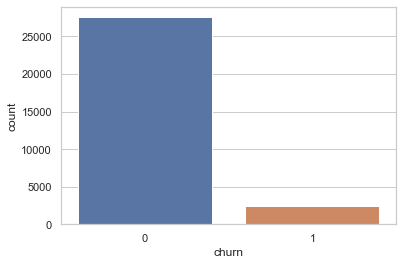


Not Churn %: 91.86
Churn     %: 8.14


In [119]:
# Churn variable distribution
sns.set(style='whitegrid')
sns.countplot(x='churn', data=telecom_df)
plt.show()
print()
print('Not Churn %:', str(round(len(telecom_df[telecom_df.churn == 0])/len(telecom_df) * 100, 2)))
print('Churn     %:', str(round(len(telecom_df[telecom_df.churn == 1])/len(telecom_df) * 100, 2)))


#### As we can see above that there is huge imbalace between churn (1) and non-churn (0) data. We'll need to keep this in mind and need  to handle this during model building process

####  Between good months(6 & 7) and action month (8)  Lets try to see if customer's 'behaviour' pattern changes between good and action months for key variables like... 
- recharge, call minutes, incmoing, outgoing, roaming, data usage, onnet, offnet calls etc

In [120]:
# Derive new features as average of month 6 & 7 
telecom_df['total_rech_amt_6_7'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_amt_7)/2
telecom_df['max_rech_amt_6_7'] = (telecom_df.max_rech_amt_6 + telecom_df.max_rech_amt_7)/2
#telecom_df['total_rech_data_6_7'] = (telecom_df.total_rech_data_6 + telecom_df.total_rech_data_7)/2
#telecom_df['av_rech_amt_data_6_7'] = (telecom_df.av_rech_amt_data_6 + telecom_df.av_rech_amt_data_7)/2
telecom_df['arpu_6_7'] =  (telecom_df.arpu_6 + telecom_df.arpu_7)/2
telecom_df['vol_2g_mb_6_7'] = (telecom_df.vol_2g_mb_6 + telecom_df.vol_2g_mb_7)/2
telecom_df['vol_3g_mb_6_7'] = (telecom_df.vol_3g_mb_6 + telecom_df.vol_3g_mb_7)/2
telecom_df['loc_og_mou_6_7'] = (telecom_df['loc_og_mou_6'] + telecom_df['loc_og_mou_7'])/2
telecom_df['std_og_mou_6_7'] = (telecom_df.std_og_mou_6 + telecom_df.std_og_mou_7)/2
telecom_df['isd_og_mou_6_7'] = (telecom_df.isd_og_mou_6 + telecom_df.isd_og_mou_7)/2
telecom_df['spl_og_mou_6_7'] = (telecom_df.spl_og_mou_6 + telecom_df.spl_og_mou_7)/2
telecom_df['total_og_mou_6_7'] = (telecom_df.total_og_mou_6 + telecom_df.total_og_mou_7)/2
telecom_df['loc_ic_mou_6_7'] = (telecom_df.loc_ic_mou_6 + telecom_df.loc_ic_mou_7)/2
telecom_df['std_ic_mou_6_7'] = (telecom_df.std_ic_mou_6 + telecom_df.std_ic_mou_7)/2
telecom_df['total_ic_mou_6_7'] = (telecom_df.total_ic_mou_6 + telecom_df.total_ic_mou_7)/2
telecom_df['isd_ic_mou_6_7'] = (telecom_df.isd_ic_mou_6 + telecom_df.isd_ic_mou_7)/2
telecom_df['spl_ic_mou_6_7'] = (telecom_df.spl_ic_mou_6 + telecom_df.spl_ic_mou_7)/2
telecom_df['roam_og_mou_6_7'] = (telecom_df.roam_og_mou_6 + telecom_df.roam_og_mou_7)/2

In [121]:
# Lets drop columns used in deriving new features above as they are redundant
drop_cols = ['total_rech_amt_7', 'max_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7',
             'arpu_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'loc_og_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
             'total_og_mou_7', 'loc_ic_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7',
             'roam_og_mou_7', 'total_rech_amt_6', 'max_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6',
             'arpu_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
             'total_og_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6',
             'roam_og_mou_6']
            
print("Before:", str(len(telecom_df.columns)))
telecom_df.drop(drop_cols, axis=1, inplace=True)
print("After:", str(len(telecom_df.columns)))

Before: 153
After: 117


In [122]:
# Derived cols
derived_cols = ['total_rech_amt_6_7', 'max_rech_amt_6_7', 
'arpu_6_7', 'vol_2g_mb_6_7', 'vol_3g_mb_6_7', 'loc_og_mou_6_7', 'std_og_mou_6_7', 'isd_og_mou_6_7', 'spl_og_mou_6_7',
'total_og_mou_6_7', 'loc_ic_mou_6_7', 'std_ic_mou_6_7', 'total_ic_mou_6_7', 'isd_ic_mou_6_7', 'spl_ic_mou_6_7',
'roam_og_mou_6_7']

# Month 8
month_8_cols = ['total_rech_amt_8', 'max_rech_amt_8', 
'arpu_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'spl_ic_mou_8',
'roam_og_mou_8']
cols_67_and_8 = list(zip(derived_cols, month_8_cols))
cols_67_and_8

[('total_rech_amt_6_7', 'total_rech_amt_8'),
 ('max_rech_amt_6_7', 'max_rech_amt_8'),
 ('arpu_6_7', 'arpu_8'),
 ('vol_2g_mb_6_7', 'vol_2g_mb_8'),
 ('vol_3g_mb_6_7', 'vol_3g_mb_8'),
 ('loc_og_mou_6_7', 'loc_og_mou_8'),
 ('std_og_mou_6_7', 'std_og_mou_8'),
 ('isd_og_mou_6_7', 'isd_og_mou_8'),
 ('spl_og_mou_6_7', 'spl_og_mou_8'),
 ('total_og_mou_6_7', 'total_og_mou_8'),
 ('loc_ic_mou_6_7', 'loc_ic_mou_8'),
 ('std_ic_mou_6_7', 'std_ic_mou_8'),
 ('total_ic_mou_6_7', 'total_ic_mou_8'),
 ('isd_ic_mou_6_7', 'isd_ic_mou_8'),
 ('spl_ic_mou_6_7', 'spl_ic_mou_8'),
 ('roam_og_mou_6_7', 'roam_og_mou_8')]

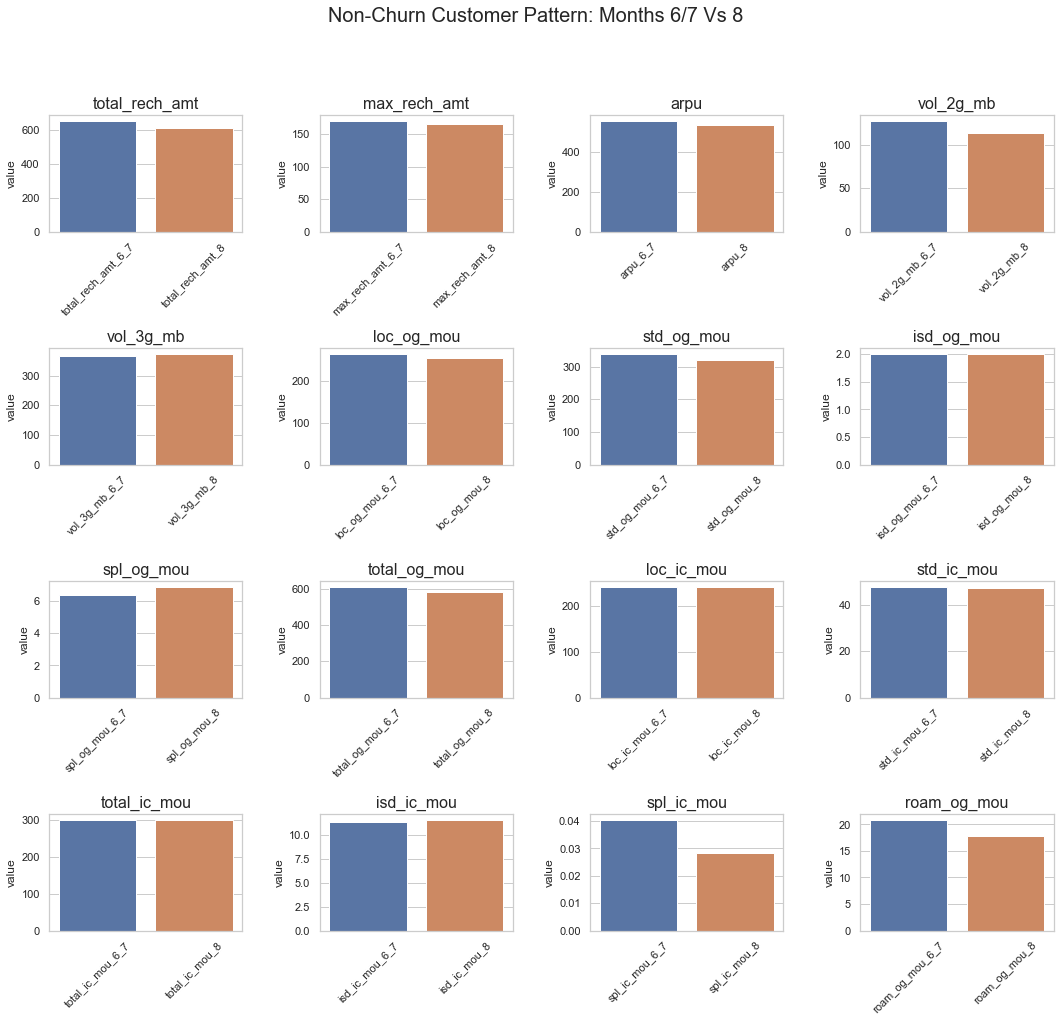

In [123]:
# Lets compare features between good month (6 & 7) with action month (8) 
# for customers identified as "not-churning"
not_churn_df = telecom_df[telecom_df.churn == 0]
i=1
fig = plt.figure(figsize=(18, 15))
fig.subplots_adjust(hspace=1.0, wspace=0.4)
for cols in cols_67_and_8:
    title = cols[0][0:-4]
    plt.subplot(4, 4, i)
    df = pd.melt(not_churn_df[list(cols)]).groupby('variable').mean().reset_index()
    ax = sns.barplot(x='variable', y='value', data=df)
    ax.set_title(title, size=16)
    ax.set_xlabel('')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    i += 1
fig.suptitle('Non-Churn Customer Pattern: Months 6/7 Vs 8', fontsize=20)
plt.show()

#### We observe that there is not much of difference in usage parameters between good months (6 & 7) and action month (8) for customers identified as "not-churning" which means there behaviour pattern largely remains consistent across these three months.

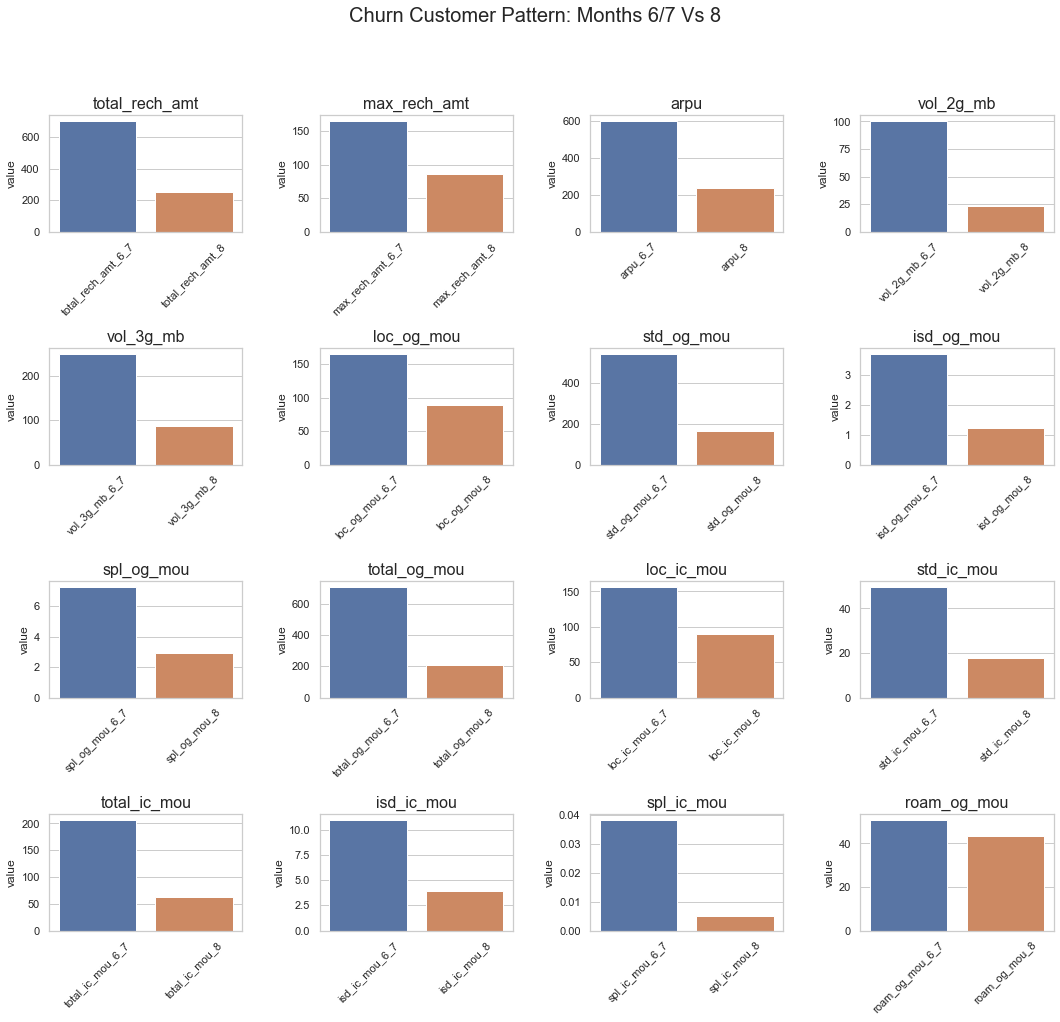

In [124]:
# Lets compare features between good month (6 & 7) with action month (8) 
# for customers identified "churning"
churn_df = telecom_df[telecom_df.churn == 1]
i=1
fig = plt.figure(figsize=(18, 15))
fig.subplots_adjust(hspace=1.0, wspace=0.4)
for cols in cols_67_and_8:
    title = cols[0][0:-4]
    plt.subplot(4, 4, i)
    df = pd.melt(churn_df[list(cols)]).groupby('variable').mean().reset_index()
    ax = sns.barplot(x='variable', y='value', data=df)
    ax.set_title(title, size=16)
    ax.set_xlabel('')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    i += 1
fig.suptitle('Churn Customer Pattern: Months 6/7 Vs 8', fontsize=20)
plt.show()

#### From above plots we observe very clearly that in month 8 which is action month (i.e. customer has made-up their mind to leave their current service provider) most of the parameters of usages have gone down significantly compare to months 6 & 7 (good months). This is a clear-cut behavioural pattern indicating a high likelyhood of customer chruning.

# 3. Build Model
- We'll build multiple models like Random Forest, Adaboost & XGBoost 
- Model's hyperparameter will be tuned if neccessary using GridSearch
- Finally we'll select best performing model  

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 3.1 Preprocessing

In [126]:
# Create dependent and independent variables
y = telecom_df['churn']
X = telecom_df.drop(['churn', 'mobile_number', 'circle_id'], axis=1)
# Split data in test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Scale independent training variables
scaler = StandardScaler()
scaler.fit(X_train)
cols = X_train.columns
X_train = pd.DataFrame(scaler.transform(X_train), columns=cols)
print('Train Set Rows:', str(len(X_train)), ' | Train Set Columns:', str(len(X_train.columns)), '\n')
X_train.head()

Train Set Rows: 21000  | Train Set Columns: 114 



,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_call_rech_amt_6,total_data_call_rech_amt_7,total_data_call_rech_amt,total_rech_amt_6_7,max_rech_amt_6_7,arpu_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,loc_og_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,total_og_mou_6_7,loc_ic_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,isd_ic_mou_6_7,spl_ic_mou_6_7,roam_og_mou_6_7
0,-0.968891,-0.474695,-0.416622,-0.361124,-0.768461,-0.733466,-0.304111,-0.219384,-0.172168,-0.181016,-0.185142,-0.224745,-0.086539,-0.256286,-0.622705,-0.640227,-0.345737,-0.282438,-0.163431,-0.299793,-0.253031,-0.197425,-0.242689,-0.337176,-0.384152,-0.402605,-0.369176,-0.443307,-0.427826,-0.354320,-0.149826,-0.136645,-0.143387,-0.452417,-0.041104,-0.284023,-0.141391,-0.016131,-0.017253,-0.787986,-0.261093,-0.237511,-0.242810,-0.608752,-0.559088,-0.298908,-0.337139,-0.188396,-0.290277,-0.297210,-0.093983,-0.080265,-0.189590,-0.305656,-0.260979,-0.242753,0.816038,-0.140190,-0.118392,-0.255839,-0.780983,-0.235907,-0.157837,-0.08712,-0.102768,-0.107193,-0.614782,-0.814240,-0.859411,-0.909243,-0.919995,0.671924,-0.702804,-0.640032,-0.340544,-0.37783,-0.401223,-0.408192,-0.377496,-0.426863,-0.444660,-0.418969,2.868758,1.179358,-0.33704,-0.212156,-0.204953,-0.18368,-0.154751,-0.404771,1.717411,1.354218,-0.151569,0.672479,-0.044426,0.438634,-0.044568,0.226859,-0.251821,0.981664,0.064076,-0.357453,2.118350,-0.553341,-0.595879,-0.045914,-0.352849,-0.840719,-0.609650,-0.212716,-0.630912,-0.163726,-0.244726,-0.246694
1,-0.180660,-0.074391,-0.267602,-0.099910,0.896947,0.665780,-0.159718,-0.219384,0.596858,0.933405,1.529505,-0.166188,-0.134295,-0.197829,-0.312605,-0.327952,-0.337094,-0.282438,-0.286380,-0.299793,-0.253031,-0.197425,-0.242689,-0.360847,0.036633,-0.250814,-0.216255,1.324989,0.647756,-0.159849,-0.149826,-0.136645,-0.143387,-0.252342,-0.041104,-0.315741,-0.141391,-0.016131,-0.017253,-0.406373,-0.314339,-0.039350,-0.248955,0.012517,-0.152206,0.063924,-0.329398,-0.321305,-0.317313,-0.131803,-0.182890,-0.174476,-0.003777,0.043446,0.216765,-0.254325,-0.132184,-0.140190,-0.118392,-0.207013,-0.205260,-0.235907,-0.157837,-0.01948,-0.096060,-0.018818,-0.405457,0.241987,0.541342,-0.192048,-0.184304,0.060586,-0.248476,-0.501314,-0.340544,-0.37783,-0.401223,-0.408192,-0.377496,-0.426863,-0.444660,-0.418969,-0.350002,-0.345017,-0.33704,-0.212156,-0.204953,-0.18368,-0.785536,-0.404771,-0.406788,-0.380756,-0.151569,-0.312905,-0.345601,-0.275903,-0.401852,-0.404001,-0.132464,-0.323820,-0.164046,-0.426917,-0.417012,-0.339546,0.620648,-0.045914,-0.352849,0.366559,-0.200579,-0.033946,-0.210512,-0.163726,0.692580,0.659942
2,-0.437760,-0.3124

In [127]:
# Scale independent test variables
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
print('Test Set Rows:', str(len(X_test)), ' | Test Set Columns:', str(len(X_test.columns)), '\n')
X_test.head()

Test Set Rows: 9001  | Test Set Columns: 114 



,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_call_rech_amt_6,total_data_call_rech_amt_7,total_data_call_rech_amt,total_rech_amt_6_7,max_rech_amt_6_7,arpu_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,loc_og_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,total_og_mou_6_7,loc_ic_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,isd_ic_mou_6_7,spl_ic_mou_6_7,roam_og_mou_6_7
0,0.723300,-0.494801,-0.428405,-0.401894,0.116211,-0.014032,-0.082076,-0.219384,-0.172168,-0.181016,-0.185142,-0.225420,-0.150704,-0.112699,1.096002,0.846057,0.539774,-0.265486,-0.129819,0.091775,-0.253031,0.322537,-0.242689,0.286295,-0.406536,-0.380014,-0.372773,-0.441099,-0.427304,-0.340378,-0.149826,-0.136645,-0.143387,-0.476251,-0.041104,-0.256149,0.145499,-0.016131,-0.017253,-0.273893,-0.052969,-0.149730,-0.298363,0.291281,0.504748,0.094308,-0.050057,-0.037011,-0.058370,-0.099620,-0.163994,0.002548,0.012651,-0.109632,-0.242910,0.046223,0.099946,-0.14019,-0.052452,0.029608,-0.092635,-0.235907,-0.157837,-0.08712,-0.102768,-0.107193,-0.510120,0.030741,-0.105159,0.733814,1.695155,0.182854,-0.353321,0.358737,-0.331831,1.406813,-0.401223,1.810245,-0.377496,-0.426863,-0.44466,-0.418969,-0.350002,-0.345017,1.273392,-0.212156,-0.204953,-0.18368,2.117745,0.277403,-0.210655,0.217793,4.219884,-0.312905,-0.243665,-0.351052,-0.113758,-0.272391,0.060914,-0.191698,0.116092,-0.358246,-0.373221,0.536522,-0.594457,-0.045914,-0.104565,-0.247515,0.229124,-0.185570,0.094335,-0.163726,-0.244726,-0.246694
1,-0.968891,-0.573891,-0.561528,-0.361124,-0.788650,-0.745445,-0.304111,-0.219384,-0.172168,-0.181016,-0.185142,-0.381408,-0.363016,-0.256286,-0.667668,-0.672545,-0.345737,-0.282438,-0.286380,-0.299793,-0.253031,0.061524,-0.242689,-0.337176,-0.410196,-0.412061,-0.369176,-0.443307,-0.431872,-0.354320,-0.149826,-0.136645,-0.143387,-0.452417,-0.041104,-0.284023,-0.141391,-0.016131,-0.017253,-0.787986,-0.410919,-0.405116,-0.242810,-0.693844,-0.701040,-0.298908,-0.337139,-0.321305,-0.290277,-0.297210,-0.182890,-0.174476,-0.189590,-0.305656,-0.290750,-0.242753,-0.132184,-0.14019,-0.118392,-0.255839,-0.780983,-0.235907,-0.157837,-0.08712,-0.102768,-0.107193,-1.138095,-0.602995,-0.859411,-0.909243,-0.919995,1.025141,-0.702804,-0.640032,-0.340544,-0.377830,-0.401223,-0.408192,-0.377496,-0.426863,-0.44466,-0.418969,1.259378,1.179358,-0.337040,-0.212156,-0.204953,-0.18368,-1.070643,-0.375731,1.048738,-0.239494,-0.151569,-0.137292,-0.178797,-0.381737,-0.364274,-0.442433,-0.696868,0.506657,-0.769956,0.523830,-0.109882,-0.727752,-0.609778,-0.045914,-0.143954,-0.940758,-0.791285,-0.354073,-0.841033,-0.163726,-0.244726,-0.246694
2,-0.948239,-0.330894,-0.4946

## 3.2 Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [129]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8300
           1       0.74      0.48      0.58       701

    accuracy                           0.95      9001
   macro avg       0.85      0.73      0.78      9001
weighted avg       0.94      0.95      0.94      9001



In [130]:
# Lets look at AUC
y_pred_prob = rf.predict_proba(X_test)
y_pred_prob = [p[1] for p in y_pred_prob]
print( roc_auc_score(y_test, y_pred_prob) )

0.9106663458398501


## 3.3 Adaboost

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8300
           1       0.67      0.52      0.59       701

    accuracy                           0.94      9001
   macro avg       0.82      0.75      0.78      9001
weighted avg       0.94      0.94      0.94      9001



In [133]:
# Lets look at AUC
y_pred_prob = ab.predict_proba(X_test)
y_pred_prob = [p[1] for p in y_pred_prob]
print( roc_auc_score(y_test, y_pred_prob) )

0.9167559252702681


## 3.4 XGBoost

In [134]:
import xgboost as xgb

In [135]:
xb=xgb.XGBClassifier(random_state=42, learning_rate=0.01)
xb.fit(X_train, y_train)
y_pred = xb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8300
           1       0.71      0.53      0.61       701

    accuracy                           0.95      9001
   macro avg       0.84      0.76      0.79      9001
weighted avg       0.94      0.95      0.94      9001



In [136]:
# Lets look at AUC
y_pred_prob = xb.predict_proba(X_test)
y_pred_prob = [p[1] for p in y_pred_prob]
print( roc_auc_score(y_test, y_pred_prob) )

0.9048221989240843


#### We observe that... 
- All three models are giving good overall accruracy 
- But low scores for precision and recall. 
- Since for this analysis we are more interested in identying 'churn' customer (class 1) , this is not acceptable,we need to deal with low precision and recall scores 
- The issue could be due to class imbalance in data, discussed in next section

## 3.5 Handle class imbalance
- We have churn rate (class 1) only 8% whereas not-churn rate is 92%. 
- This imbalance will make our model's  prediction highly skewed towards non-churn class, leading the overall accruacy to be very high (~92%) 
- Churn class prediction accuracy will be low. 
- Overall accuracy will still look good but that misleading. Lets handle the class imbalance using up-sampling technique

In [137]:
from sklearn.utils import resample

In [138]:
# Segreagate churn and not churn customers 
churn_df = telecom_df[telecom_df.churn == 1]
not_churn_df = telecom_df[telecom_df.churn == 0]
len(not_churn_df)

27560

In [139]:
# Upsample class 1 (churn) to make churn count equal to non-churn count
churn_upsampled_df = resample(churn_df, replace=True, n_samples=27560, random_state=42) 
# Combined upsampled data with not-churn data
balanced_df = pd.concat([not_churn_df, churn_upsampled_df])
len(balanced_df)

55120

In [140]:
# Prepare data for model building
# Create dependent and independent variables
y = balanced_df['churn']
X = balanced_df.drop(['churn', 'mobile_number', 'circle_id'], axis=1)
# Split data in test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Scale independent training variables
scaler = StandardScaler()
scaler.fit(X_train)
cols = X_train.columns
X_train = pd.DataFrame(scaler.transform(X_train), columns=cols)
print('Train Set Rows:', str(len(X_train)), ' | Train Set Columns:', str(len(X_train.columns)), '\n')
X_train.head()

Train Set Rows: 38584  | Train Set Columns: 114 



,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_call_rech_amt_6,total_data_call_rech_amt_7,total_data_call_rech_amt,total_rech_amt_6_7,max_rech_amt_6_7,arpu_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,loc_og_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,total_og_mou_6_7,loc_ic_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,isd_ic_mou_6_7,spl_ic_mou_6_7,roam_og_mou_6_7
0,-0.593267,-0.575355,-0.537194,-0.457514,-0.576657,-0.659128,-0.546316,-0.189663,-0.19058,-0.181126,-0.21107,-0.316501,-0.282414,-0.283207,-0.244584,-0.469225,-0.375019,0.017391,-0.089129,-0.056006,-0.234226,-0.182352,1.395613,-0.432750,-0.451083,-0.427021,-0.325890,-0.457121,-0.435090,-0.341502,-0.143351,-0.129769,-0.115585,-0.450203,-0.056384,0.285407,-0.186531,-0.020108,-0.019383,-0.535925,-0.367654,-0.370872,-0.356040,-0.394791,-0.448956,-0.313303,-0.237230,-0.264413,-0.273306,-0.448339,-0.188892,-0.175658,-0.172377,-0.320352,-0.260718,-0.244097,-0.132638,-0.132892,-0.098786,-0.292951,-0.416822,-0.143541,-0.141694,-0.097363,-0.095596,-0.079563,-0.739340,-0.663646,-0.430695,-0.546697,-0.540119,-0.458488,-0.416439,-0.260521,-0.276127,-0.297548,2.154677,2.225928,-0.290440,-0.415442,-0.413403,-0.340806,-0.352763,-0.328931,-0.279223,-0.211008,-0.189621,-0.152164,0.373770,-0.316949,-0.362549,-0.355538,-0.115192,-0.182946,-0.214446,-0.406738,-0.451780,-0.516770,-0.717184,0.048474,-0.726977,2.630085,-0.400194,-0.452436,-0.663146,-0.084834,-0.387532,-0.826812,-0.546340,-0.356300,-0.620316,-0.170211,0.545233,-0.255301
1,-0.447377,-0.588178,-0.559712,-0.299649,-0.754761,-0.718529,-0.647122,-0.205845,-0.19058,-0.181126,-0.21107,-0.348831,-0.339786,-0.301798,-0.607959,-0.598138,-0.566444,-0.178314,-0.189533,-0.238347,-0.234226,0.251314,-0.218213,-0.580030,-0.451083,-0.427021,-0.137999,-0.470321,-0.445563,-0.319017,-0.143351,-0.129769,-0.115585,-0.309106,-0.056384,-0.284645,-0.186531,-0.020108,-0.019383,-0.499393,-0.370893,-0.386021,-0.353120,-0.639458,-0.632571,-0.625824,-0.303422,-0.289541,-0.273306,-0.666266,-0.189429,-0.175658,-0.172377,-0.221574,-0.260718,-0.208185,-0.132638,-0.132892,-0.098786,-0.266176,-0.584765,-0.143541,-0.141694,-0.097363,-0.095596,-0.079563,-0.643467,-0.562352,-0.204280,-0.402762,0.024650,-0.490088,-0.238004,-0.353176,-0.176810,-0.297548,-0.344228,-0.342486,-0.290440,1.987107,0.363753,1.118268,-0.352763,-0.328931,-0.279223,-0.211008,0.653373,-0.152164,-0.954982,-0.316949,-0.362549,-0.355538,-0.115192,0.203988,-0.093500,-0.264279,-0.444579,-0.429884,-1.137140,-0.768112,-1.147218,0.194212,-0.400194,-0.673121,-0.672180,-0.084834,-0.147205,-0.929521,-0.716414,-0.322577,-0.749193,-0.170211,-0.281465,-0.269617
2

In [141]:
# Scale independent test variables using scaler fitted on to training set
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
print('Test Set Rows:', str(len(X_test)), ' | Test Set Columns:', str(len(X_test.columns)), '\n')
X_test.head()

Test Set Rows: 16536  | Test Set Columns: 114 



,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_call_rech_amt_6,total_data_call_rech_amt_7,total_data_call_rech_amt,total_rech_amt_6_7,max_rech_amt_6_7,arpu_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,loc_og_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,total_og_mou_6_7,loc_ic_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,isd_ic_mou_6_7,spl_ic_mou_6_7,roam_og_mou_6_7
0,-0.828723,-0.495660,-0.526882,-0.289449,0.051392,-0.659649,-0.194424,-0.205845,-0.190580,-0.181126,-0.21107,-0.153802,-0.277332,-0.171603,0.658311,-0.525136,-0.183801,4.931809,0.579072,-0.238347,-0.234226,-0.182352,-0.218213,-0.171347,-0.434672,-0.418021,-0.321953,-0.458494,-0.445563,-0.310141,-0.126621,-0.129769,-0.115585,-0.391897,-0.056384,-0.246487,0.721159,-0.020108,-0.019383,-0.623203,-0.207067,-0.368164,-0.155285,0.074493,-0.569698,-0.128215,-0.251854,-0.283442,-0.213238,-0.110395,-0.185562,-0.163003,-0.167371,-0.320352,-0.260718,-0.190592,-0.050199,-0.132892,-0.098786,-0.197611,-0.598083,-0.143541,-0.141694,-0.097363,-0.095596,-0.079563,1.273998,-0.663646,-0.770317,-0.757335,-0.709549,-0.458488,-0.622325,-0.474340,-0.276127,-0.297548,-0.344228,-0.342486,-0.29044,-0.415442,-0.413403,-0.340806,-0.352763,-0.328931,-0.279223,-0.211008,-0.189621,-0.152164,2.202930,-0.316949,-0.362549,-0.273708,-0.115192,-0.340586,-0.328017,-0.079506,-0.646861,-0.449056,-0.219387,-0.530066,-0.126560,-0.404712,-0.400194,0.166050,-0.658141,-0.054389,-0.297552,-0.534943,-0.367694,-0.346052,-0.466715,-0.170211,-0.281465,-0.269617
1,-0.814528,-0.371131,-0.523192,-0.466573,-0.505761,-0.717228,-0.670822,-0.205845,-0.190580,-0.181126,-0.21107,0.107983,-0.249281,-0.304544,-0.338198,-0.574220,-0.570071,-0.178314,-0.189533,-0.238347,0.115292,-0.182352,-0.218213,-0.584060,-0.412293,-0.425939,-0.325890,-0.322808,-0.445563,-0.344905,-0.143351,-0.129769,-0.115585,-0.452425,-0.056384,-0.266722,0.610977,-0.020108,-0.019383,-0.622715,0.271393,-0.178985,-0.361881,-0.176558,-0.629868,-0.625824,-0.267760,-0.289541,-0.273306,-0.670540,0.447502,-0.063817,-0.172377,0.246484,-0.238801,-0.244097,-0.129080,-0.132892,-0.098786,-0.292951,-0.598083,-0.143541,-0.141694,-0.097363,-0.095596,-0.079563,1.178125,-0.866234,-0.883524,-0.757335,-0.709549,-0.237283,-0.622325,-0.474340,-0.276127,-0.297548,-0.344228,-0.342486,-0.29044,2.787956,-0.413403,-0.340806,-0.352763,-0.328931,-0.279223,-0.211008,-0.189621,-0.152164,1.955562,-0.316949,-0.362549,0.627143,-0.115192,0.576591,-0.328017,0.409226,-0.683521,-0.189215,-0.714301,-0.683741,-0.706396,-0.362667,0.058569,-0.386953,-0.599931,-0.084834,-0.179666,-0.730694,-0.304366,0.098553,-0.120696,0.396681,-0.281465,-0.269617
2,-0.728

## 3.6 Random Forest - With Balanced Classes

In [142]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8270
           1       0.98      1.00      0.99      8266

    accuracy                           0.99     16536
   macro avg       0.99      0.99      0.99     16536
weighted avg       0.99      0.99      0.99     16536



In [143]:
# Lets look at AUC
y_pred_prob = rf.predict_proba(X_test)
y_pred_prob = [p[1] for p in y_pred_prob]
print( roc_auc_score(y_test, y_pred_prob) )

0.9999090181922656


## 3.7 AdaBoost - With Balanced Classes

In [144]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8270
           1       0.87      0.84      0.85      8266

    accuracy                           0.86     16536
   macro avg       0.86      0.86      0.86     16536
weighted avg       0.86      0.86      0.86     16536



In [145]:
# Lets look at AUC
y_pred_prob = ab.predict_proba(X_test)
y_pred_prob = [p[1] for p in y_pred_prob]
print( roc_auc_score(y_test, y_pred_prob) )

0.9311364702247606


## 3.8 XGBoost - With Balanced Classes

In [146]:
xb=xgb.XGBClassifier(random_state=42, learning_rate=0.01)
xb.fit(X_train, y_train)
y_pred = xb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8270
           1       0.90      0.88      0.89      8266

    accuracy                           0.89     16536
   macro avg       0.89      0.89      0.89     16536
weighted avg       0.89      0.89      0.89     16536



In [147]:
# Lets look at AUC
y_pred_prob = xb.predict_proba(X_test)
y_pred_prob = [p[1] for p in y_pred_prob]
print( roc_auc_score(y_test, y_pred_prob) )

0.9504203858348369


#### With imbalance handled 
- All models are performing much better. 
- By far 'Random Forest' has out performed both boosting algorithm based models with almost perfect precision and recall scores which means model is able to identify almost all 'churn' cases. 
- We'll choose the random-forst model for our final model for deployment. 

#### NOTE: It would be possible to improve boosting model's score by tuning their hyperparameters using Grid Search Cross Validation however we are not going to perform tuning for this analysis due to 2 reasons:
1. We already have found a model that can predict 'churn' with impressive accuracy
2. The current hardware that we are running poses a limitation on us to run GridSearchCV for boosting algorithms given multiple hyperparameters and large numbers of columns in dataset, this is a very resource intensive process and requires hardware with much higher specifiction  not at our disposal at present

# 4. Conclusion and Corrective Action Suggestions

### 4.1 Important Features

In [148]:
# Lets examine parameters of of Random Forest model
imp_features = pd.Series(rf.feature_importances_, index=X.columns)
imp_features.sort_values(ascending=False)

total_ic_mou_8                0.059378
total_og_mou_8                0.056259
total_rech_amt_8              0.046383
last_day_rch_amt_8            0.041432
loc_ic_mou_8                  0.038396
roam_og_mou_8                 0.033171
loc_og_t2m_mou_8              0.032020
loc_ic_t2m_mou_8              0.028933
vol_2g_mb_8                   0.027195
loc_og_mou_8                  0.025315
max_rech_amt_8                0.024253
arpu_8                        0.023339
roam_ic_mou_8                 0.021324
loc_og_t2f_mou_8              0.016997
loc_ic_t2t_mou_8              0.014940
vol_3g_mb_8                   0.014163
total_rech_num_8              0.013340
loc_og_t2t_mou_8              0.013135
offnet_mou_8                  0.012750
loc_ic_t2f_mou_8              0.011917
spl_og_mou_8                  0.010729
std_ic_mou_8                  0.009967
total_rech_amt_6_7            0.009921
arpu_6_7                      0.009527
std_ic_t2m_mou_8              0.009109
aon                      

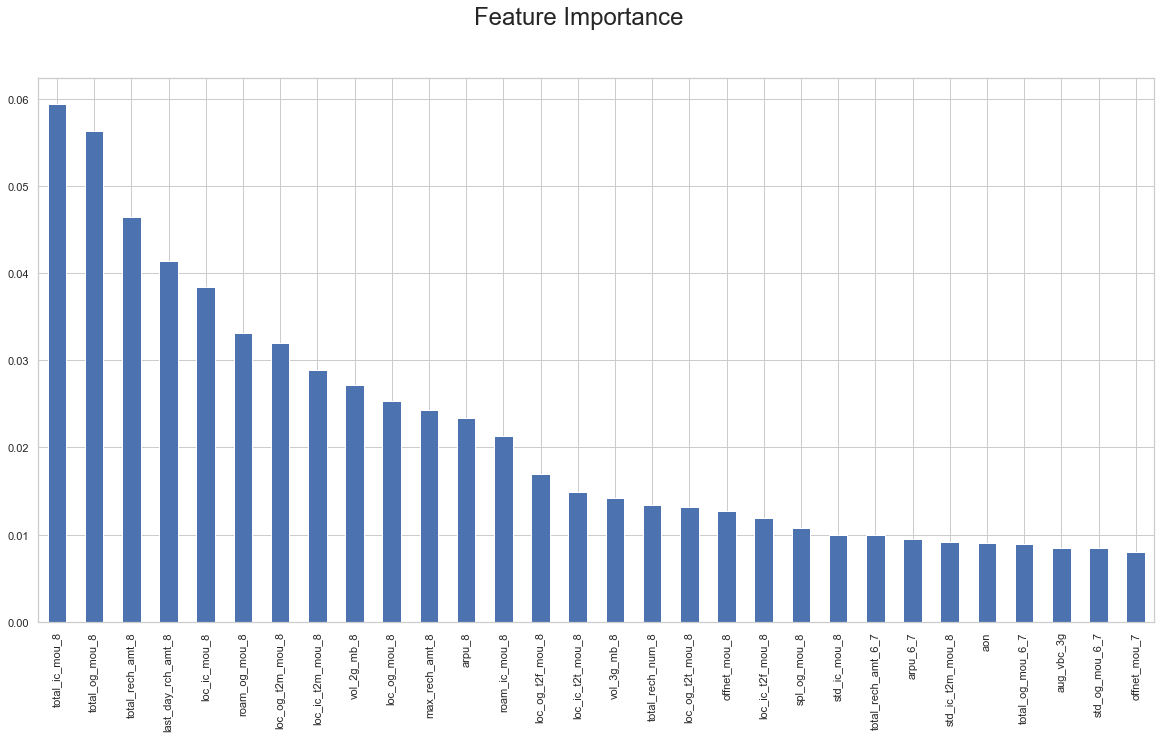

In [149]:
# Top 30 features
plt.figure(figsize=(20, 10))
imp_features.sort_values(ascending=False).nlargest(30).plot.bar()
plt.suptitle('Feature Importance', fontsize=24)
plt.show()

### 4.2 Conclusion and Suggestions

#### - Its clear from plot above and feature importance list 
- The most important features are coming from action month (8). Which makes sense because this is the month when customer behaviour changes and he decides to churn. Model has captured this pattern correctly
- The most important features (shown above) indicative of churn are related with recharge amount, incoming, outgoing calls usage and data usage

#### - In order to identify potential churn customer telecom operator... 
- Can deploy our model to predict the potential churn customer by feeding data for 3 months (previous two months considered as good month and 3rd month (the current month of interest) is action month where customer behavior changes if he is about to churn. 
- Based on the supplied 3 months data, our model will predict the potential 'churn' customer

#### - Once potential churn customers are identified (before they actually have churned) telecom company can adopt various strategies listed below to turn them around and retain them...
- Offer perks such as free data bundle, free talktime, free merchandise, movie tickets etc
- Analyse the support calls to find out if these customers have registered any complain regarding charges, service degradation, call quality, internet speed etc. 
- Proactively reach out to customers and address their compalin quickly and efficiently. A quick identification of issue and resolution will go long way in retaining customer base.
- If its found during support log analysis if that large population of customers are unhappy with various charges (call, data roaming, offnet etc) then telecom operator needs to re-think , conduct market research wrt to competitors services and chatges and accordingly adjust their fee and charges to remain competitive and keep its high value customer base intact.